<a href="https://colab.research.google.com/github/Adhiraj-11/ML-projects/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
class_names = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

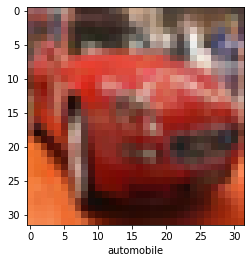

In [ ]:
IMG_INDEX = 5

plt.imshow(train_images[IMG_INDEX])
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

CNN ARCHITECTURE

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

adding dense layers

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=10,
                    validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 1.4821 - accuracy: 0.4586 - val_loss: 1.2161 - val_accuracy: 0.5662
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1244 - accuracy: 0.6023 - val_loss: 1.0020 - val_accuracy: 0.6427
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9704 - accuracy: 0.6584 - val_loss: 0.9133 - val_accuracy: 0.6802
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8685 - accuracy: 0.6954 - val_loss: 0.9354 - val_accuracy: 0.6691
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7934 - accuracy: 0.7231 - val_loss: 0.8909 - val_accuracy: 0.6874
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7305 - accuracy: 0.7428 - val_loss: 0.8431 - val_accuracy: 0.7090
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6807 - accuracy: 0.7615 - val_loss: 0.8411 - val_accurac

In [ ]:
test_loss,test_acc = model.evaluate(test_images, test_labels,verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.8460 - accuracy: 0.7190 - 730ms/epoch - 2ms/step
0.718999981880188
